# **Customer Personality Analysis**
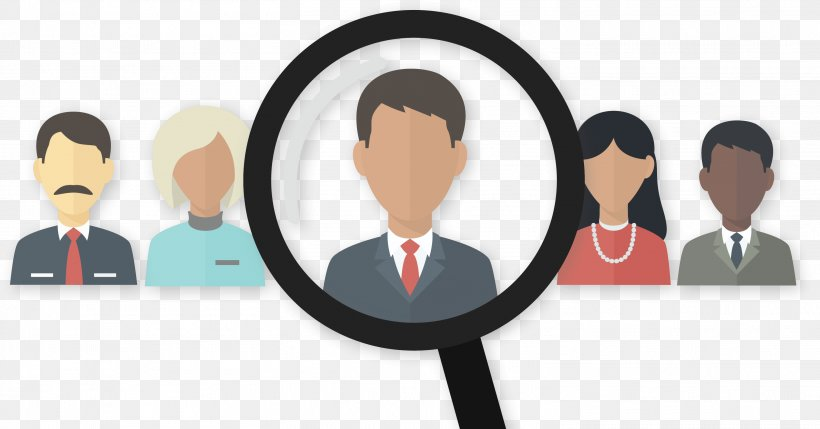

Customer Personality Analysis is a detailed analysis of a company’s ideal Customers. It helps a business to better understand its Customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

### Details about the columns

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if data complained in the last 2 years, 0 otherwise

Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years 

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years 

MntGoldProds: Amount spent on gold in last 2 years

Promotion

NumDealsPurchases: Number of purchases made with a discount AcceptedCmp1: 1 if data accepted the offer in the 1st campaign, 0 otherwise AcceptedCmp2: 1 if data accepted the offer in the 2nd campaign, 0 otherwise AcceptedCmp3: 1 if data accepted the offer in the 3rd campaign, 0 otherwise AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

NumWebPurchases: Number of purchases made through the company’s web site 

NumCatalogPurchases: Number of purchases made using a catalogue 

NumStorePurchases: Number of purchases made directly in stores 

NumWebVisitsMonth: Number of visits to company’s web site in the last month

# 1.IMPORTING LIBRARIES


In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split

# 2.READ DATA

In [2]:
#Loading the dataset
data = pd.read_csv("C:\VISHAL\code\project\customer\marketing_campaign.csv")
print("Number of datapoints:", len(data))
  #displays first 5 rows of your dataset and verify whether it is correct or not

Number of datapoints: 2240


In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
data.shape

(2240, 29)

In [6]:
#PRINT THE COMPLETE INFORMATION OF THE DATASET.....
print("Print a Summary of a Dataframe is :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.describe() #it will return the statistical summary of numerical data present in dataset .

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# **DATA PREPROCESSING TECHNIQUES**

## Data Cleaning
Data cleaning means fixing bad data in your data set.
Dirty data could be:

• Empty cells

• Data in wrong format

• Wrong data

• Duplicates

### Empty Cells / Missing Values

In [8]:
#We calculate the number of missing values in all columns
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can see we only have null values in "Income" variable.

**Complete case analysis (CCA)**

In CCA, you simply remove all the rows or records where any column or field contains a missing value.

In [9]:
data_1 = data.copy()
data_1.shape

(2240, 29)

In [10]:
data_1 = data_1.dropna()

In [11]:
print(data_1.shape)
data_1.isnull().sum()

(2216, 29)


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

We can see above that columns having missing values were deleted as the shape of the dataframe changes.

*Handling Missing Numerical Data*

• Mean, Median, Mode Imputation

Mean Imputation

Calculate the MEAN, and replace any empty values with it:

In [12]:
data_1 = data.copy()
data_1["Income"].isnull().sum()

24

In [13]:
x = data["Income"].mean()
print("Mean of column Income before Mean Imputaion is : ",x)
data["Income"].fillna(x, inplace = True)
data["Income"].isnull().sum()

Mean of column Income before Mean Imputaion is :  52247.25135379061


0

Mode Imputation

Calculate the MODE, and replace any empty values with it:

In [14]:
data_1 = data.copy()
data["Income"].isnull().sum()

0

In [15]:
x = data_1["Income"].mode()[0]
print("Mode of column Income before Mode Imputaion is : ",x)
data_1["Income"].fillna(x, inplace = True)
data_1["Income"].isnull().sum()

Mode of column Income before Mode Imputaion is :  52247.25135379061


0

Median Imputation

Calculate the Median, and replace any empty values with it:



In [16]:
data_1 = data.copy()
data_1["Income"].isnull().sum()

0

In [17]:
x = data_1["Income"].median()
print("Median of column Income before Median Imputaion is : ",x)
data_1["Income"].fillna(x, inplace = True)
data_1["Income"].isnull().sum()

Median of column Income before Median Imputaion is :  51741.5


0

In [18]:
#Count the number of unique values in the Dataframe
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


• Z_Revenue & Z_CostContact have Constant value, which don't provide any information so we should drop them

In [19]:
# Drop constant columns - Z_CostContact & Z_Revenue
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [20]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

• Marital_Status : It also has many categories which can be converted to Single and Couple categories

In [21]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd','Divorced','Widow'],'Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Together','Married'],'Couple')

In [22]:
data['Marital_Status'].value_counts()

Couple    1444
Single     796
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Frequency Of Each Category in the Marital_Status Variable ')

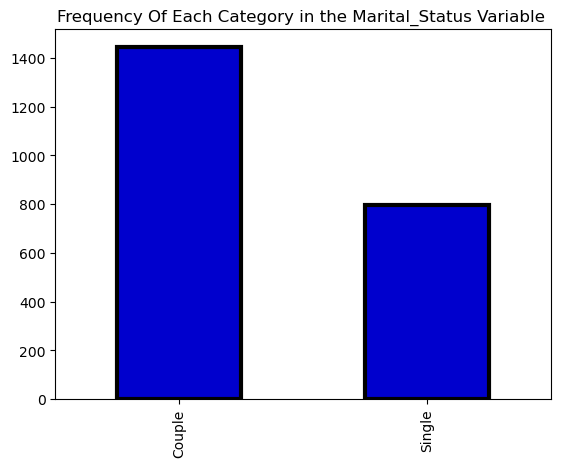

In [23]:
data['Marital_Status'].value_counts().plot(kind='bar',color = 'MediumBlue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable ")

In [24]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

• Education : It has too many categories this can be converted to UG and PG categories.

In [25]:
data['Education'] = data['Education'].replace(['Graduation', 'Master','PhD'],'Post Graduate')  
data['Education'] = data['Education'].replace(['Basic','2n Cycle'], 'Under Graduate')

In [26]:
print("Unique categories present in the Education:",data["Education"].value_counts())

Unique categories present in the Education: Post Graduate     1983
Under Graduate     257
Name: Education, dtype: int64


Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable ')

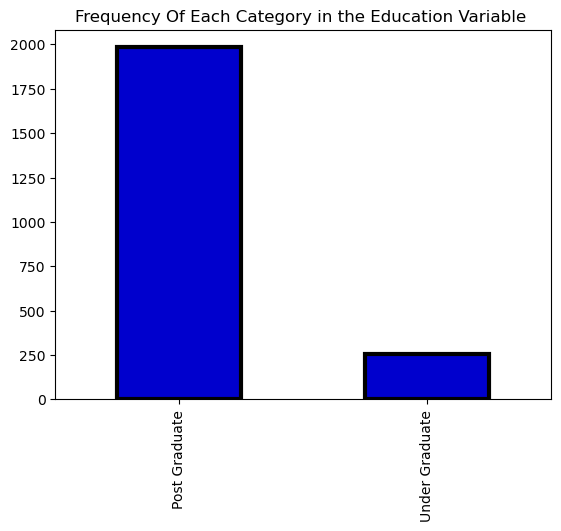

In [27]:
data['Education'].value_counts().plot(kind='bar',color = 'mediumblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable ")

• We can add a column that tells us about Total offers accepted

• We can add a column that gives us total number of purchases made by customer

• Kid home and Teen Home we feel that the kid home and teen home variables can collectively define the child variable.

In [28]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Post Graduate,Couple,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Post Graduate,Couple,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Post Graduate,Couple,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [29]:
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts']+ data['MntSweetProducts'] + data['MntGoldProds']

data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

data['Child']=data['Kidhome']+data['Teenhome']

In [30]:
# Deleting some column to reduce dimensions
col_del =["AcceptedCmp1","AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)

We can change Year_Birth to Age as age is more informative

In [31]:
# Change Year_Birth to Age (Age is more informative)
data['Year_Birth'] = 2023 - data.Year_Birth.to_numpy()
data.rename(columns = {'Year_Birth':'Age'},inplace = True)

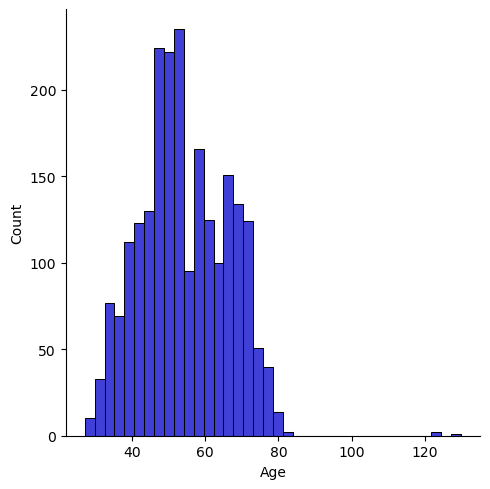

In [32]:
sns.displot(data["Age"],color = 'Mediumblue')

Number of days a customer was engaged with company

Changing Dt_customer into timestamp format

In [33]:
# Number of days a customer was engaged with company
# Changing Dt_customer into timestamp format
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
data['first_day'] = '01-01-2015'
data['first_day'] = pd.to_datetime(data.first_day)
data['day_engaged'] = (data['first_day'] - data['Dt_Customer']).dt.days

C:\Users\visha\AppData\Local\Temp\ipykernel_23040\3051071364.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)


In [34]:
data=data.drop(columns=["ID", "Dt_Customer", "first_day", "Dt_Customer", "Recency"],axis=1)

Text(0.5, 1.0, 'Distribution of Categories')

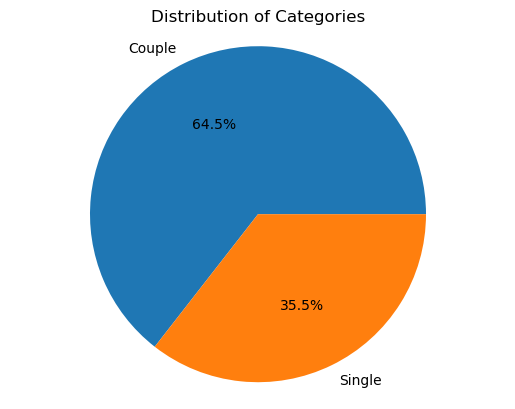

In [48]:
marital = data["Marital_Status"].value_counts()

# Plotting the pie chart
plt.pie(marital.values, labels=marital.index,autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Distribution of Categories')

Text(0.5, 1.0, 'Distribution of Categories')

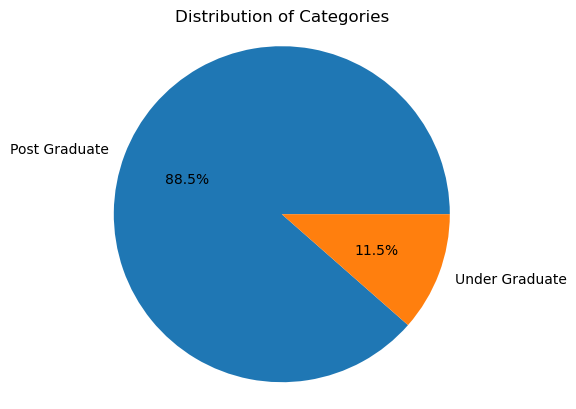

In [49]:
Education = data["Education"].value_counts()

# Plotting the pie chart
plt.pie(Education.values, labels=Education.index,autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Distribution of Categories')

## Encoding Categorical Data

In [ ]:
data.head()

We find that we have 2 CATEGORICAL VARIABLES i.e. Education and Martial_Status

In [ ]:
print(data['Education'].unique())
print(data['Marital_Status'].unique())

We will use LABEL ENCODING

 In label encoding, labels are replaced by integers.

 This is why label encoding is also called integer encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'education' column
data['Education'] = label_encoder.fit_transform(data['Education'])


In [ ]:
data.tail()

In [ ]:
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data.tail()

In [ ]:
#data.loc[(data['Age'] >= 13) & (data['Age'] <= 19), 'AgeGroup'] = 'Teen'
#data.loc[(data['Age'] >= 20) & (data['Age']<= 39), 'AgeGroup'] = 'Adult'
#data.loc[(data['Age'] >= 40) & (data['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
#data.loc[(data['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

On the basis of Age let's divide the customers into different age groups

In [ ]:
data.head()

### Removing Outliers

In [ ]:
for column in data.columns:
    plt.boxplot(data[column])
    plt.xlabel('Feature: ' + column)
    plt.ylabel('Values')
    plt.title('Boxplot of ' + column)
    plt.show()

Here seems to be some outliers in the Age and Income columns

There are some customers aged above 100. This is unlikely to happen. Let's drop those customers from data.

There are some customers who are earning more than 120,000 and some of them even more than 600,000. They are clearly the outliers in the data, so we will leave them out.

In [ ]:
data = data[data.Age < 100]
data = data[data.Income < 120000]